In [1]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor

# Utils

In [2]:
# generate random non-zero entries from [-10, -1] and [1, 10]
def generate_sparse_vector(N, s):
    x = np.zeros(N)
    non_zero_indices = np.random.choice(N, s, replace=False)
    for i in non_zero_indices:
        if np.random.rand() < 0.5:  # fifty-fifty chance to be positive or negative
            x[i] = np.random.uniform(-10, -1)
        else:
            x[i] = np.random.uniform(1, 10)
    return x

def generate_A_and_x(M, N, s):
    A = np.random.randn(M, N)
    A = A / np.sqrt(np.sum(A**2, axis=0))
    x = generate_sparse_vector(N, s)
    return A, x

def calculate_normalized_error(x, x_hat):
    return np.linalg.norm(x - x_hat) / np.linalg.norm(x)

# Noisy case: (n != 0)

## (b) $||n||_2$ is known

In [3]:
def omp(A, y, noise_norm):
    # initialize
    residual = y
    index_set = []
    x = np.zeros(A.shape[1])

    while np.linalg.norm(residual) > noise_norm:
        # find the most correlated column
        idx = np.argmax(np.abs(A.T @ residual))
        if idx in index_set:
            # This check prevents the same index from being selected again,
            # which would otherwise cause the algorithm to run indefinitely.
            break
        index_set.append(idx)
        
        # update the solution
        A_selected = A[:, index_set]
        x_temp = np.linalg.lstsq(A_selected, y, rcond=None)[0]
        
        # update the residual
        residual = y - A_selected @ x_temp
    
    for i, idx in enumerate(index_set):
        x[idx] = x_temp[i]
    
    return x

def single_trial(M, N, s_max, sigma):
    A, x = generate_A_and_x(M, N, s_max)
    n = np.random.normal(0, sigma, M)
    y = A @ x + n
    x_hat = omp(A, y, np.linalg.norm(n))
    
    # Check if the error is small enough
    error = np.linalg.norm(x - x_hat)
    success = error < 1e-3
    
    # Calculate the normalized error
    normalized_error = error / np.linalg.norm(x)
    
    return success, normalized_error



def experiment(N, s_max, M_values, sigma, num_trials=2000):
    success_rates = []
    normalized_errors = []
    
    with ProcessPoolExecutor() as executor:
        for M in M_values:
            # 确保为map调用提供所有需要的参数
            results = list(executor.map(single_trial, [M]*num_trials, [N]*num_trials, [s_max]*num_trials, [sigma]*num_trials))
            
            # 计算成功率和平均归一化误差
            success_count = sum(1 for success, _ in results if success)
            total_normalized_error = sum(error for _, error in results)
            
            success_rate = success_count / num_trials
            average_normalized_error = total_normalized_error / num_trials
            
            success_rates.append(success_rate)
            normalized_errors.append(average_normalized_error)
    
    return success_rates, normalized_errors

s_max=1
success_rates=[0.0785, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 errors=[1.3031963887285538, 2.4286399629630997e-05, 2.1658853805686496e-05, 2.257990719655414e-05, 2.0810491696279265e-05, 2.1452005925402164e-05, 2.083173175329942e-05, 2.059650421358012e-05, 1.928109575235007e-05, 1.9645401697748302e-05]
s_max=2
success_rates=[0.0, 0.0, 0.0635, 0.249, 0.4505, 0.593, 0.7285, 0.7885, 0.8895, 0.9185],
 errors=[1.2395866382698264, 1.2894558721602207, 1.0450971635635038, 0.7983603034386005, 0.5916443119048771, 0.4384923627842615, 0.2986464151240491, 0.24248503840132304, 0.12352618745298832, 0.09152611518280628]
s_max=3
success_rates=[0.0, 0.0, 0.0, 0.005, 0.051, 0.1825, 0.3205, 0.463, 0.654, 0.712],
 errors=[1.3392759869153261, 1.2885816398557937, 1.2215337990105417, 1.1217611915709833, 0.9552868660998992, 0.827293585826078, 0.6620839411969804, 0.5221959395475041, 0.3466199956303073, 0.2893895970224841]
s_max=4
success_rates=[0.0, 0.0, 0.0, 0.0, 0.0005, 0.02, 0.0665, 0.175, 0.28

/tmp/ipykernel_117875/2498532925.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


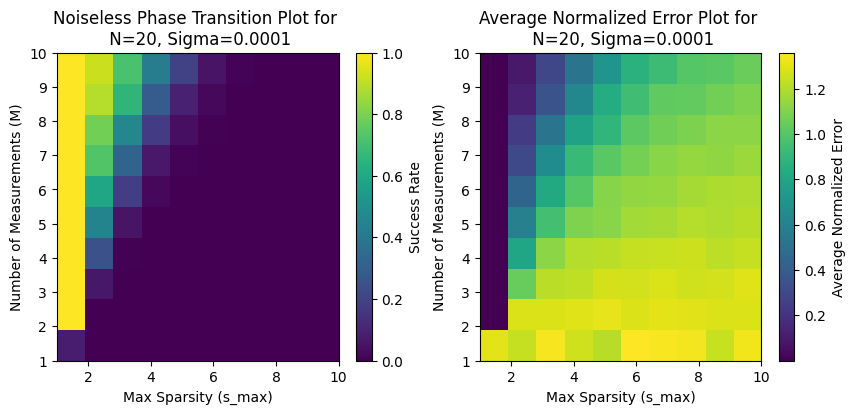

s_max=1
success_rates=[0.0, 0.9855, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 errors=[1.4142167827185346, 0.020526123072629878, 2.2008878520035e-05, 1.9414026451480506e-05, 1.9663068202574716e-05, 2.0838528631220798e-05, 1.905259553193884e-05, 1.9923783296826912e-05, 2.1727433115499673e-05, 2.0284452372074137e-05, 1.971434750419098e-05, 2.015960628350381e-05, 1.9856299210590272e-05, 1.7849459595417918e-05, 1.9176712141623148e-05, 2.0628379424508434e-05, 2.0538732096266522e-05, 2.0748832986074142e-05, 2.089617655389873e-05, 2.0115378798798135e-05, 1.9184238525272943e-05, 2.0405243997219265e-05, 2.1435312635925354e-05, 2.1734467597076045e-05, 2.025073799230188e-05]
s_max=2
success_rates=[0.0, 0.0, 0.015, 0.093, 0.2605, 0.432, 0.5945, 0.7125, 0.8025, 0.849, 0.886, 0.926, 0.9415, 0.9615, 0.9775, 0.9785, 0.9905, 0.99, 0.998, 0.997, 0.999, 0.9985, 0.9995, 0.9995, 1.0],
 errors=[1.4338951851202282, 1.347518951304633, 1

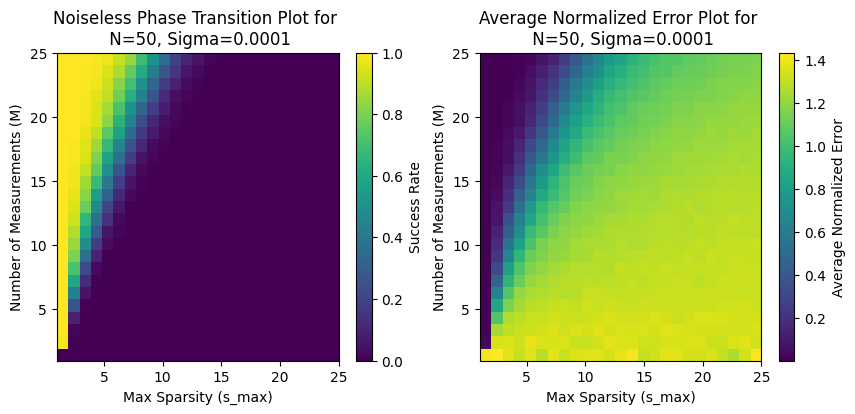

s_max=1
success_rates=[0.0025, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 errors=[1.4106854894380272, 0.001433253980658987, 2.1020680847641197e-05, 2.050634005287961e-05, 2.1338843757910767e-05, 2.1359528604482167e-05, 1.9907397452860528e-05, 1.9776099767063966e-05, 2.060392709306833e-05, 1.9486135805581705e-05, 2.0933793749942033e-05, 1.9662769574091772e-05, 1.988169524582224e-05, 2.09117755260405e-05, 2.0708099774255832e-05, 2.022222874696957e-05, 2.090210208067308e-05, 2.09277330471869e-05, 2.0245004241739847e-05, 2.0661602825497285e-05, 2.0514933617967523e-05, 2.0896952691255303e-05, 2.0612785900829696e-05, 1.990038197604346e-05, 1.9779186390021278e-05, 1.9166163847558787e-05, 1.948475502246206e-05, 2.1078588016007556e-05, 2.079568645194698e-05, 2.0065166602205923e-05, 2.02087946

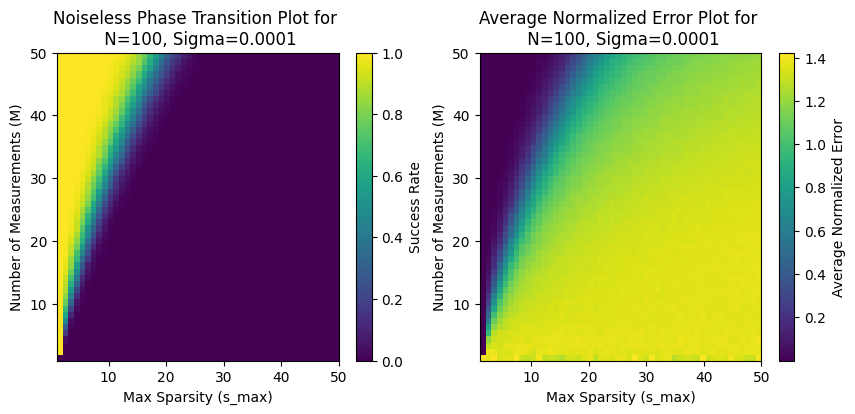

s_max=1
success_rates=[0.031, 0.647, 0.664, 0.691, 0.655, 0.679, 0.6855, 0.679, 0.6875, 0.684],
 errors=[1.302480142282901, 0.001651652341101002, 0.00020967847891391128, 0.00019802810373520334, 0.00020657684694256446, 0.00022729316741915332, 0.00021103452225238977, 0.00019621767137171993, 0.00020207369603555213, 0.00020407801884028334]
s_max=2
success_rates=[0.0, 0.0, 0.0135, 0.0745, 0.19, 0.263, 0.2885, 0.276, 0.3485, 0.327],
 errors=[1.236380824902893, 1.2894806340857223, 1.0829091030925289, 0.8157548532120746, 0.5704627625818621, 0.4250910310827658, 0.2961573762114272, 0.2610795782707052, 0.12645789177501604, 0.07834660762933705]
s_max=3
success_rates=[0.0, 0.0, 0.0, 0.0, 0.0055, 0.031, 0.0535, 0.0705, 0.101, 0.0955],
 errors=[1.3396795032713582, 1.3029664055447632, 1.202760337814011, 1.1243547146049269, 0.9579542266798736, 0.8318730426151711, 0.6432833718677339, 0.5306731664792843, 0.34179495748681604, 0.28762999958146207]
s_max=4
success_rates=[0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.01

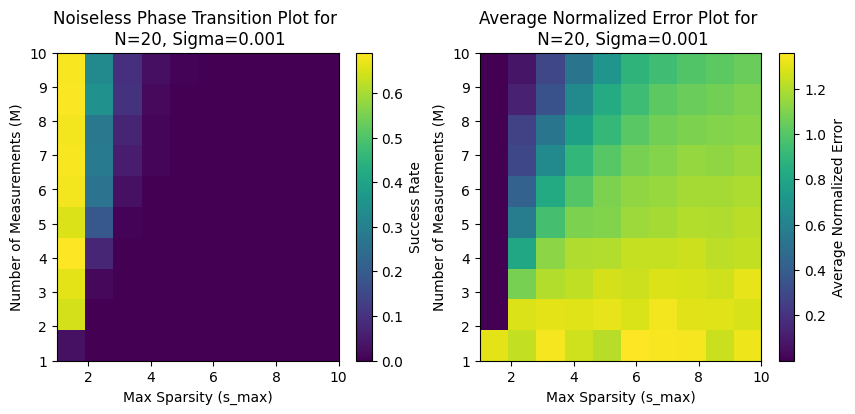

s_max=1
success_rates=[0.0, 0.6725, 0.6565, 0.6855, 0.7015, 0.679, 0.693, 0.7035, 0.6715, 0.678, 0.671, 0.7005, 0.6835, 0.6755, 0.6645, 0.6945, 0.675, 0.662, 0.6755, 0.681, 0.6825, 0.691, 0.673, 0.688, 0.6865],
 errors=[1.4142434384270448, 0.026366571202264814, 0.00022050184497027833, 0.00019603833161861218, 0.00019965420339567924, 0.00021341853424058213, 0.00019453344467217475, 0.0002017439645297799, 0.00021277417487468642, 0.00020014556284374092, 0.00019657766844268654, 0.00020177510906513115, 0.00019761008006722127, 0.00019966844862372247, 0.00020252187899879342, 0.00019839563511355425, 0.00021255255645471566, 0.0002152909346887958, 0.00020296440719185858, 0.00020437605742110854, 0.00020103509061721554, 0.00019826518293356325, 0.0002068165552409616, 0.00020793689087703152, 0.00020844071740264077]
s_max=2
success_rates=[0.0, 0.0, 0.008, 0.0395, 0.0935, 0.172, 0.2205, 0.2655, 0.301, 0.311, 0.308, 0.3455, 0.348, 0.3575, 0.3445, 0.356, 0.373, 0.3755, 0.3655, 0.3675, 0.382, 0.372, 0.4085

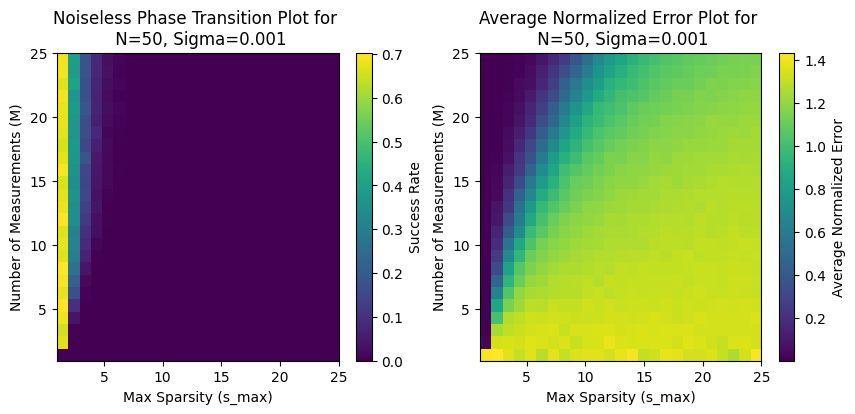

s_max=1
success_rates=[0.0, 0.652, 0.673, 0.6755, 0.6565, 0.69, 0.6535, 0.6885, 0.675, 0.7055, 0.6855, 0.6655, 0.69, 0.6975, 0.676, 0.6945, 0.6875, 0.683, 0.6755, 0.6825, 0.688, 0.674, 0.666, 0.7035, 0.6895, 0.677, 0.675, 0.69, 0.672, 0.671, 0.6805, 0.7075, 0.7065, 0.6835, 0.685, 0.6845, 0.6805, 0.6755, 0.6845, 0.6805, 0.6825, 0.671, 0.68, 0.6905, 0.684, 0.684, 0.685, 0.7025, 0.6655, 0.668],
 errors=[1.4107539521575199, 0.027074322481992482, 0.00020315793342437464, 0.00019489047175338335, 0.00021153280003010817, 0.0002123497311675348, 0.00021056173265094589, 0.0002023772821943021, 0.0001976354761336437, 0.00019280236314218717, 0.00020406330633892142, 0.00020803173474078193, 0.00020355048231004551, 0.00020835494104999743, 0.0002095774485470006, 0.00019426009933494533, 0.00021656832016240745, 0.00019961657106153008, 0.00020727305401608713, 0.0002120628434689704, 0.00021039106506030828, 0.00021481301320225074, 0.0002108167357394879, 0.00020239013920596337, 0.00020291800361939595, 0.000197

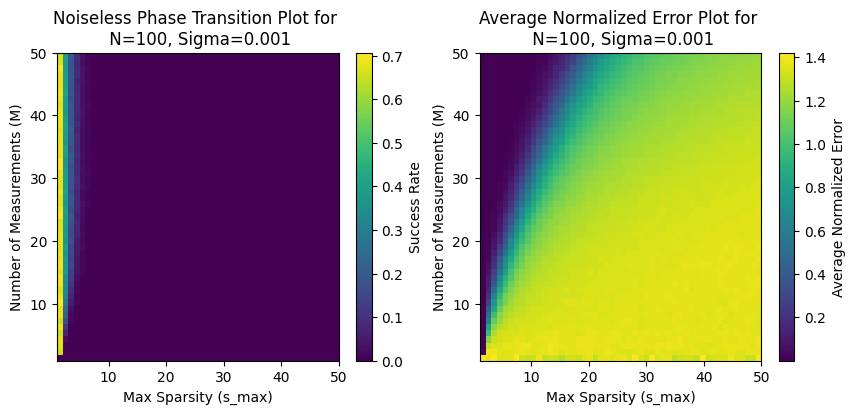

In [4]:
N_values = [20, 50, 100]
sigma_values = [0.0001, 0.001]

for sigma in sigma_values:
    for N in N_values:
        # Experiment settings
        M_values = np.arange(1, int(N / 2) + 1)
        s_max_values = np.arange(1, int(N / 2) + 1)

        # Results
        s_all_success_rates = []
        s_all_errors = []

        # Run the experiment
        for s_max in s_max_values:
            success_rates, errors = experiment(N, s_max, M_values, sigma)
            print(f's_max={s_max}')
            print(f'success_rates={success_rates},\n errors={errors}')
            s_all_success_rates.append(success_rates)
            s_all_errors.append(errors)

        # Plot the results for success rates
        plt.figure(figsize=(10, 4))
        plt.title('Noiseless Phase Transition Plot for Sigma={}'.format(sigma))
        plt.subplot(1, 2, 1)
        plt.imshow(np.transpose(s_all_success_rates), extent=[s_max_values[0], s_max_values[-1], M_values[0], M_values[-1]], origin='lower', aspect='auto', cmap='viridis')
        plt.colorbar(label='Success Rate')
        plt.xlabel('Max Sparsity (s_max)')
        plt.ylabel('Number of Measurements (M)')
        plt.title('Noiseless Phase Transition Plot for \n N={}, Sigma={}'.format(N, sigma))

        # Plot the results for average normalized errors
        plt.subplot(1, 2, 2)
        plt.imshow(np.transpose(s_all_errors), extent=[s_max_values[0], s_max_values[-1], M_values[0], M_values[-1]], origin='lower', aspect='auto', cmap='viridis')
        plt.colorbar(label='Average Normalized Error')
        plt.xlabel('Max Sparsity (s_max)')
        plt.ylabel('Number of Measurements (M)')
        plt.title('Average Normalized Error Plot for \n N={}, Sigma={}'.format(N, sigma))
        
        plt.show()
